In [1]:
import requests

def get_pdb_ids(uniprot_id):
    url = f"https://search.rcsb.org/rcsbsearch/v2/query?json={{\"query\":{{\"type\":\"terminal\",\"service\":\"text\",\"parameters\":{{\"attribute\":\"rcsb_polymer_entity_container_identifiers.reference_sequence_identifiers.database_accession\",\"operator\":\"exact_match\",\"value\":\"{uniprot_id}\"}}}},\"return_type\":\"polymer_entity\"}}"
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()
    pdb_ids = {entry['identifier'].split('_')[0] for entry in data['result_set']}
    return pdb_ids

uniprot_id = 'Q06187'
pdb_ids = get_pdb_ids(uniprot_id)
print(f"PDB IDs for UniProt ID {uniprot_id}: {pdb_ids}")


PDB IDs for UniProt ID Q06187: {'1BTK', '1AWW', '1B55', '1QLY', '2GE9', '3GEN', '2Z0P', '1AWX', '1BWN', '1K2P'}


In [2]:
def download_pdb(pdb_id, output_file):
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    response.raise_for_status()
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded {pdb_id}.pdb to {output_file}")

# premier PDB ID de la list pour telecharger le fichier
for pdb_id in pdb_ids:
    output_file = f"{pdb_id}.pdb"
    download_pdb(pdb_id, output_file)
    break 


Downloaded 1BTK.pdb to 1BTK.pdb


In [3]:
import requests

# Fonction pour obtenir les scores de conservation de ConSurf pour une structure protéique spécifique
def get_conservation_scores(pdb_id):
    # URL de base de l'API de ConSurf
    base_url = "https://consurfdb.tau.ac.il/consurf_db/api/"
    
    # Endpoint pour obtenir les scores de conservation
    endpoint = "getConsurfData"
    
    # Paramètres de la requête
    params = {
        "pdb_id": pdb_id,
        "ChainID": "",  # Laisser vide si non pertinent
        "res_num": "",  # Laisser vide pour toute la protéine
        "FileFormat": "json"  # Format de sortie (json, text, excel)
    }
    
    # Faire la requête GET à l'API de ConSurf
    response = requests.get(f"{base_url}{endpoint}", params=params)
    
    # Vérifier si la requête a réussi
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Erreur lors de l'obtention des scores de conservation pour {pdb_id}")
        return None

# Exemple d'utilisation : Obtenir les scores de conservation pour la structure 1BTK
pdb_id = "1BTK"
conservation_scores = get_conservation_scores(pdb_id)

# Imprimer les scores de conservation (ou les gérer selon le besoin)
if conservation_scores:
    print("Scores de conservation pour la structure", pdb_id)
    print(conservation_scores)


SSLError: HTTPSConnectionPool(host='consurfdb.tau.ac.il', port=443): Max retries exceeded with url: /consurf_db/api/getConsurfData?pdb_id=1BTK&ChainID=&res_num=&FileFormat=json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1131)')))

In [2]:
import numpy as np
import torch
import os
import pandas as pd

In [4]:
# Chemin du répertoire contenant les fichiers .pt
embeddings_dir = "curated_dataset/individual_embeddings_original"

# Initialiser le dictionnaire pour stocker les embeddings
embeddings_dict = {}
count = 0

# Itérer sur les fichiers .pt dans le répertoire
for filename in os.listdir(embeddings_dir):
    count = count + 1
    # Obtenir l'ID de la séquence à partir du nom du fichier
    sequence_id = filename.split(".pt")[0]

    # Charger le tenseur d'embedding depuis le fichier .pt
    embedding = torch.load(os.path.join(embeddings_dir, filename))

    # Ajouter l'embedding au dictionnaire avec l'ID de la séquence comme clé
    embeddings_dict[sequence_id] = embedding
    if count == 2:
        print("sequence_id", sequence_id)

# Maintenant, tu as un dictionnaire avec les embeddings chargés et prêts à l'emploi
len(embeddings_dict)


sequence_id A0A5E4HS15.1


35854

In [5]:
def get_conservation_scores(csv_file):
    # Charger le CSV
    df = pd.read_csv(csv_file, delimiter=',', names=[
                     'sequence id', 'conservation score'], header=0)
    sequences = df['sequence id'].values
    conservation_scores = df['conservation score'].apply(lambda x: np.array(
    [float(i) if i != 'nan' else 0.0 for i in x.split()], dtype=np.float32)).values
    #print("conservation_scores", conservation_scores)

    return sequences, conservation_scores

sequences, conservation_scores_array = get_conservation_scores('curated_dataset/filtered_conservation_scores_35854.csv')

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('R4K6S0.1/243-358',) y 116 y 81
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A259HE10.1/43-148',) y 106 y 208
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('I0R687.1/331-428',) y 98 y 44
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A553PFE8.1/1433-1850',) y 418 y 69
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('V3Z1U4.1/125-374',) y 250 y 44
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6P8HMM9.1/556-662',) y 107 y 108
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('Q54EQ8.1/622-713',) y 92 y 76
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A1Y1Y8X0.1/333-680',) y 348 y 117
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6V2YLE5.1/558-674',) y 117 y 

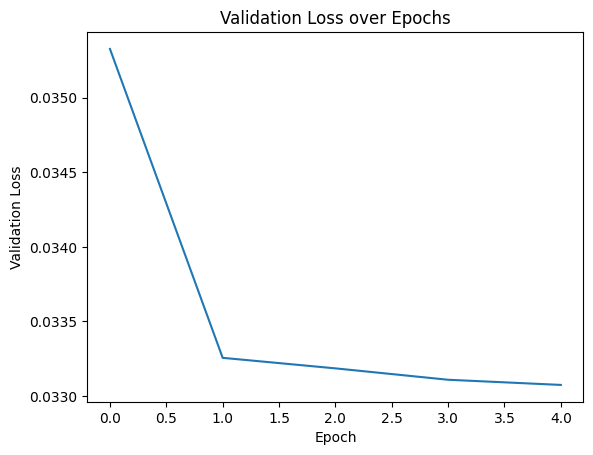

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A7M7P1K2.1/230-388',) y 159 y 190
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A4Q8C0E3.1/247-363',) y 117 y 140
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A2E2XEI3.1/363-477',) y 115 y 114
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('K2IS43.1/381-491',) y 111 y 198
Test Loss: 0.033113662077862226


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt

# datasets (train, validation, test)
dataset = [(embeddings_dict[sequence.split("/")[0]], conservation_scores, sequence) for sequence, conservation_scores in zip(sequences, conservation_scores_array)]
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size])

# Creation data loaders for train, validation, and test
train_loader = data.DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Definition model
class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# the training function
def train_model(model, optimizer, loss_fn, data_loader):
    model.train()
    for embedding, label, sequence in data_loader:
        optimizer.zero_grad()
        embedding = embedding.squeeze()
        label = label.squeeze()
        if embedding.size(0) != label.size(0):
            print(f"Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: {sequence} y {label.size(0)} y {embedding.size(0)}" )
            continue
        output = model(embedding).squeeze()
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()

# Define evaluation function
def evaluate_model(model, loss_fn, data_loader):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for embedding, label, sequence in data_loader:
            embedding = embedding.squeeze()
            label = label.squeeze()
            output = model(embedding).squeeze()
            if embedding.size(0) != label.size(0):
                print(f"Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: {sequence} y {label.size(0)} y {embedding.size(0)}" )
                continue
            loss = loss_fn(output, label)
            running_loss += loss.item()
    return running_loss / len(data_loader)

# On initialize the model, loss function, and optimizer with L2 regularization
model = LinearRegression(input_size=320)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight_decay for L2 regularization

# Train the model
num_epochs = 5
val_losses = []
for epoch in range(num_epochs):
    train_model(model, optimizer, loss_fn, train_loader)
    val_loss = evaluate_model(model, loss_fn, val_loader)
    val_losses.append(val_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss}')

# Plot validation loss over epochs
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.show()

# Finally, on evalue on test set
test_loss = evaluate_model(model, loss_fn, test_loader)
print(f'Test Loss: {test_loss}')


In [7]:
from transformers import AutoTokenizer, EsmModel
import torch
from Bio import SeqIO
import os

# Charger le tokenizer et le modèle
tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t6_8M_UR50D")
model = EsmModel.from_pretrained("facebook/esm2_t6_8M_UR50D")

def generate_embedding(sequence):
    inputs = tokenizer(sequence, return_tensors="pt")
    outputs = model(**inputs)
    # Squeeze pour enlever la dimension de lot
    embedding = outputs.last_hidden_state.squeeze(0)
    # Enlever la première et la dernière ligne
    embedding = embedding[1:-1, :]
    return embedding

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
embedding_1btk = generate_embedding("AAVILESIFLKRSQQKKKTSPLNFKKCLFLLTVHKLSYYEYDFERGRRGSKKGSIDVEKITCVETVVPEKNPPPERQIPRRGEESSEMEQISIIERFPYPFQVVYDEGPLYVFSPTEELRKRWIHQLKNVIRYNSDLVQKYHPCFWIDGQYLCCSQTAKNAMGCQILEN")

In [9]:
embedding_1btk

tensor([[ 0.1246,  0.2177, -0.0609,  ...,  0.1311,  0.2336, -0.0956],
        [ 0.0979, -0.0464, -0.0279,  ..., -0.0412,  0.1485,  0.0365],
        [ 0.0046, -0.1843,  0.3125,  ...,  0.3578,  0.2835,  0.1302],
        ...,
        [ 0.1103, -0.2611,  0.3035,  ..., -0.0811, -0.0425,  0.0694],
        [-0.0162, -0.6340,  0.3425,  ..., -0.1947,  0.1116,  0.3056],
        [ 0.1330, -0.1816,  0.2326,  ..., -0.1703, -0.2321, -0.0649]],
       grad_fn=<SliceBackward0>)

In [74]:
embedding_1btk.shape

torch.Size([169, 320])

In [10]:
len(embedding_1btk)

169

In [51]:
def read_conservation_scores(file):
    conservation_scores = []

    with open(file, 'r') as f:
        lines = f.readlines()[29:198]  # Lire de la ligne 30 à la 198
        for line in lines:
            score_str = line[18:24].strip().rstrip(',')  # Extraire les scores de conservation, enlever les espaces blancs et les virgules
            # if score_str.startswith('-'):

            if score_str.strip():  
                score = float(score_str) 
                conservation_scores.append(score)

    return conservation_scores


scores_1btk = read_conservation_scores("Consurf_Outputs_1716245811/1BTK_A_consurf_grades.txt")
print(scores_1btk)

[-1.034, 1.584, 2.128, -0.496, -0.895, -0.654, -0.327, 0.884, -0.806, -0.203, -1.255, -0.956, -1.275, -1.262, -1.216, -1.129, -0.653, -0.653, -0.587, -1.153, -1.052, 0.584, -1.137, -0.547, -1.199, -0.515, -1.144, -0.019, -1.231, -0.131, -1.066, -1.09, 0.647, 1.188, 0.741, -0.52, -0.083, -1.226, -0.865, -0.322, 0.736, -0.276, 1.574, 0.716, -0.123, 0.522, -0.293, -0.051, 0.221, 1.105, 0.541, -0.462, -1.055, -0.198, -0.571, 0.301, 1.017, 0.742, -0.154, -0.642, 0.187, -0.698, -0.827, -0.735, 0.66, -1.181, 2.529, 0.857, 0.27, 2.583, 2.015, -0.141, -1.089, 1.253, 0.747, -0.409, -0.238, 1.987, 2.598, 0.86, 0.392, 0.171, 2.135, 0.879, 2.613, 0.88, 1.827, 1.391, -0.086, -0.632, -0.126, -0.129, -0.064, -0.779, -0.827, -0.839, -0.298, -0.411, 0.333, -0.776, -0.581, -1.038, -0.185, 0.0, -0.31, -0.802, 0.988, 0.191, -0.098, -1.07, -1.043, 0.272, -0.779, -0.894, -0.164, 0.187, 0.394, 1.087, -0.29, -0.972, 2.4, 2.018, -1.157, -0.526, 1.101, 0.639, -0.288, -0.329, 2.612, 0.253, -0.534, 0.703, 1.257, -

In [55]:
min_score = min(scores_1btk)
max_score = max(scores_1btk)

normalized_scores_1btk = [(score - min_score) / (max_score - min_score) for score in scores_1btk]

print(normalized_scores_1btk)

[0.0619855967078189, 0.7353395061728395, 0.8752572016460906, 0.20036008230452673, 0.09773662551440326, 0.1597222222222222, 0.24382716049382716, 0.555298353909465, 0.12062757201646088, 0.27572016460905346, 0.005144032921810704, 0.08204732510288065, 0.0, 0.003343621399176929, 0.015174897119341548, 0.03755144032921808, 0.15997942386831274, 0.15997942386831274, 0.17695473251028807, 0.031378600823045236, 0.05735596707818927, 0.4781378600823045, 0.035493827160493804, 0.18724279835390945, 0.019547325102880618, 0.19547325102880656, 0.03369341563786008, 0.32304526748971196, 0.011316872427983493, 0.294238683127572, 0.053755144032921774, 0.04758230452674893, 0.49434156378600824, 0.6334876543209876, 0.5185185185185185, 0.1941872427983539, 0.3065843621399177, 0.012602880658436197, 0.10545267489711932, 0.2451131687242798, 0.5172325102880659, 0.2569444444444444, 0.7327674897119342, 0.5120884773662552, 0.2962962962962963, 0.46219135802469136, 0.2525720164609054, 0.3148148148148148, 0.38477366255144035

In [53]:
predicted_scores_list = [[0.3157],
        [0.2815],
        [0.3039],
        [0.3406],
        [0.3480],
        [0.3223],
        [0.3181],
        [0.3686],
        [0.4091],
        [0.3230],
        [0.2986],
        [0.3082],
        [0.3047],
        [0.2577],
        [0.2479],
        [0.2697],
        [0.2767],
        [0.2532],
        [0.2249],
        [0.2779],
        [0.3256],
        [0.2776],
        [0.3079],
        [0.3785],
        [0.3213],
        [0.3516],
        [0.5597],
        [0.4152],
        [0.5192],
        [0.4102],
        [0.4308],
        [0.3898],
        [0.3709],
        [0.3935],
        [0.3477],
        [0.3531],
        [0.3490],
        [0.4878],
        [0.4960],
        [0.3649],
        [0.4835],
        [0.4257],
        [0.3413],
        [0.3124],
        [0.3090],
        [0.4117],
        [0.3377],
        [0.3163],
        [0.3770],
        [0.2869],
        [0.2839],
        [0.2382],
        [0.3175],
        [0.2464],
        [0.2745],
        [0.2768],
        [0.2872],
        [0.3137],
        [0.2596],
        [0.3636],
        [0.3130],
        [0.4909],
        [0.3046],
        [0.3309],
        [0.2417],
        [0.2183],
        [0.1865],
        [0.2695],
        [0.1950],
        [0.1588],
        [0.1860],
        [0.2571],
        [0.2362],
        [0.2169],
        [0.2282],
        [0.2069],
        [0.2186],
        [0.2071],
        [0.3232],
        [0.2129],
        [0.2167],
        [0.2547],
        [0.1970],
        [0.1657],
        [0.1714],
        [0.1915],
        [0.2255],
        [0.2021],
        [0.2438],
        [0.2289],
        [0.2511],
        [0.2851],
        [0.2754],
        [0.3017],
        [0.3324],
        [0.2839],
        [0.3428],
        [0.3264],
        [0.3866],
        [0.3617],
        [0.4488],
        [0.3686],
        [0.4259],
        [0.3129],
        [0.4169],
        [0.3227],
        [0.2564],
        [0.3206],
        [0.3322],
        [0.3640],
        [0.4682],
        [0.4084],
        [0.4415],
        [0.5655],
        [0.3605],
        [0.3261],
        [0.1762],
        [0.2616],
        [0.4760],
        [0.5247],
        [0.2096],
        [0.2285],
        [0.6131],
        [0.3842],
        [0.3136],
        [0.3520],
        [0.5174],
        [0.3082],
        [0.2757],
        [0.3526],
        [0.3913],
        [0.2721],
        [0.3261],
        [0.3332],
        [0.2529],
        [0.2767],
        [0.2709],
        [0.2670],
        [0.2499],
        [0.2622],
        [0.3897],
        [0.3741],
        [0.4401],
        [0.4924],
        [0.3881],
        [0.4785],
        [0.3149],
        [0.3923],
        [0.3933],
        [0.2904],
        [0.4286],
        [0.3498],
        [0.5687],
        [0.5282],
        [0.3692],
        [0.3278],
        [0.2913],
        [0.3144],
        [0.2764],
        [0.3040],
        [0.2816],
        [0.3163],
        [0.3871],
        [0.5198],
        [0.3259],
        [0.3232],
        [0.3133],
        [0.3019],
        [0.3144]]


In [56]:


predicted_scores_array = [valor for sublista in predicted_scores_list for valor in sublista]


print(predicted_scores_array)


[0.3157, 0.2815, 0.3039, 0.3406, 0.348, 0.3223, 0.3181, 0.3686, 0.4091, 0.323, 0.2986, 0.3082, 0.3047, 0.2577, 0.2479, 0.2697, 0.2767, 0.2532, 0.2249, 0.2779, 0.3256, 0.2776, 0.3079, 0.3785, 0.3213, 0.3516, 0.5597, 0.4152, 0.5192, 0.4102, 0.4308, 0.3898, 0.3709, 0.3935, 0.3477, 0.3531, 0.349, 0.4878, 0.496, 0.3649, 0.4835, 0.4257, 0.3413, 0.3124, 0.309, 0.4117, 0.3377, 0.3163, 0.377, 0.2869, 0.2839, 0.2382, 0.3175, 0.2464, 0.2745, 0.2768, 0.2872, 0.3137, 0.2596, 0.3636, 0.313, 0.4909, 0.3046, 0.3309, 0.2417, 0.2183, 0.1865, 0.2695, 0.195, 0.1588, 0.186, 0.2571, 0.2362, 0.2169, 0.2282, 0.2069, 0.2186, 0.2071, 0.3232, 0.2129, 0.2167, 0.2547, 0.197, 0.1657, 0.1714, 0.1915, 0.2255, 0.2021, 0.2438, 0.2289, 0.2511, 0.2851, 0.2754, 0.3017, 0.3324, 0.2839, 0.3428, 0.3264, 0.3866, 0.3617, 0.4488, 0.3686, 0.4259, 0.3129, 0.4169, 0.3227, 0.2564, 0.3206, 0.3322, 0.364, 0.4682, 0.4084, 0.4415, 0.5655, 0.3605, 0.3261, 0.1762, 0.2616, 0.476, 0.5247, 0.2096, 0.2285, 0.6131, 0.3842, 0.3136, 0.352, 0.51

In [41]:
len(predicted_scores_array)

169

In [48]:
len(scores_1btk)

169

In [57]:
import numpy as np


scores_1btk_array = np.array(normalized_scores_1btk)
predicted_scores_array = np.array(predicted_scores_array)


diff_score_1btk = scores_1btk_array - predicted_scores_array

print("diff_score_1btk:", diff_score_1btk)



diff_score_1btk: [-0.2537144   0.45383951  0.5713572  -0.14023992 -0.25026337 -0.16257778
 -0.07427284  0.18669835 -0.28847243 -0.04727984 -0.29345597 -0.22615267
 -0.3047     -0.25435638 -0.2327251  -0.23214856 -0.11672058 -0.09322058
 -0.04794527 -0.2465214  -0.26824403  0.20053786 -0.27240617 -0.1912572
 -0.30175267 -0.15612675 -0.52600658 -0.09215473 -0.50788313 -0.11596132
 -0.37704486 -0.3422177   0.12344156  0.23998765  0.17081852 -0.15891276
 -0.04241564 -0.47519712 -0.39054733 -0.11978683  0.03373251 -0.16875556
  0.39146749  0.19968848 -0.0127037   0.05049136 -0.08512798 -0.00148519
  0.00777366  0.32523992  0.18317819 -0.02909506 -0.26091564  0.03060617
 -0.09343004  0.12854979  0.30230617  0.20507572  0.02872305 -0.20079136
  0.06302881 -0.34249465 -0.18937366 -0.19201111  0.25598519 -0.19412305
  0.79189506  0.27885391  0.20237654  0.83348395  0.66019342  0.03456667
 -0.18836049  0.43330576  0.29186173  0.01583663  0.04811811  0.63189177
  0.67294198  0.33622551  0.2120551

In [62]:
def normalize_scores(scores):
    min_score = min(scores)
    max_score = max(scores)
    normalized_scores = [round((score - min_score) / (max_score - min_score), 4) for score in scores]
    return normalized_scores

diff_score_1btk_normalized = normalize_scores(diff_score_1btk)
print(diff_score_1btk_normalized)


[0.2323, 0.7319, 0.8149, 0.3125, 0.2348, 0.2967, 0.359, 0.5433, 0.2078, 0.3781, 0.2043, 0.2518, 0.1963, 0.2319, 0.2472, 0.2476, 0.3291, 0.3457, 0.3776, 0.2374, 0.2221, 0.5531, 0.2191, 0.2764, 0.1984, 0.3012, 0.0401, 0.3464, 0.0529, 0.3296, 0.1452, 0.1698, 0.4986, 0.5809, 0.5321, 0.2993, 0.3815, 0.0759, 0.1357, 0.3269, 0.4353, 0.2923, 0.6879, 0.5525, 0.4025, 0.4471, 0.3514, 0.4104, 0.417, 0.6411, 0.5408, 0.3909, 0.2272, 0.4331, 0.3455, 0.5022, 0.6249, 0.5563, 0.4318, 0.2697, 0.456, 0.1696, 0.2778, 0.2759, 0.5922, 0.2744, 0.9706, 0.6084, 0.5544, 1.0, 0.8776, 0.4359, 0.2785, 0.7174, 0.6176, 0.4227, 0.4455, 0.8577, 0.8866, 0.6489, 0.5612, 0.4942, 0.8917, 0.6857, 0.9966, 0.6676, 0.8156, 0.7529, 0.4553, 0.3666, 0.4428, 0.4183, 0.4369, 0.2885, 0.2581, 0.2902, 0.3469, 0.3379, 0.4305, 0.2467, 0.2206, 0.1943, 0.3087, 0.4221, 0.2924, 0.2695, 0.6414, 0.4513, 0.3907, 0.1917, 0.123, 0.4041, 0.1898, 0.0814, 0.3587, 0.4467, 0.5902, 0.6557, 0.2543, 0.096, 0.9309, 0.8482, 0.0, 0.2762, 0.6216, 0.5105, 0.

In [63]:
import numpy as np

np.save('diff_score_1btk_normalized.npy', diff_score_1btk_normalized)

import pickle

with open('diff_score_1btk_normalized.pkl', 'wb') as f:
    pickle.dump(diff_score_1btk_normalized, f)


In [65]:
import pickle

file_path_diff_score_1btk_normalized = 'diff_score_1btk_normalized.pkl'

with open(file_path_diff_score_1btk_normalized, 'rb') as file:
    diff_score_1btk_normalized = pickle.load(file)

print(diff_score_1btk_normalized)

[0.2323, 0.7319, 0.8149, 0.3125, 0.2348, 0.2967, 0.359, 0.5433, 0.2078, 0.3781, 0.2043, 0.2518, 0.1963, 0.2319, 0.2472, 0.2476, 0.3291, 0.3457, 0.3776, 0.2374, 0.2221, 0.5531, 0.2191, 0.2764, 0.1984, 0.3012, 0.0401, 0.3464, 0.0529, 0.3296, 0.1452, 0.1698, 0.4986, 0.5809, 0.5321, 0.2993, 0.3815, 0.0759, 0.1357, 0.3269, 0.4353, 0.2923, 0.6879, 0.5525, 0.4025, 0.4471, 0.3514, 0.4104, 0.417, 0.6411, 0.5408, 0.3909, 0.2272, 0.4331, 0.3455, 0.5022, 0.6249, 0.5563, 0.4318, 0.2697, 0.456, 0.1696, 0.2778, 0.2759, 0.5922, 0.2744, 0.9706, 0.6084, 0.5544, 1.0, 0.8776, 0.4359, 0.2785, 0.7174, 0.6176, 0.4227, 0.4455, 0.8577, 0.8866, 0.6489, 0.5612, 0.4942, 0.8917, 0.6857, 0.9966, 0.6676, 0.8156, 0.7529, 0.4553, 0.3666, 0.4428, 0.4183, 0.4369, 0.2885, 0.2581, 0.2902, 0.3469, 0.3379, 0.4305, 0.2467, 0.2206, 0.1943, 0.3087, 0.4221, 0.2924, 0.2695, 0.6414, 0.4513, 0.3907, 0.1917, 0.123, 0.4041, 0.1898, 0.0814, 0.3587, 0.4467, 0.5902, 0.6557, 0.2543, 0.096, 0.9309, 0.8482, 0.0, 0.2762, 0.6216, 0.5105, 0.

In [73]:
import numpy as np

def insert_conservation_scores(pdb_file, scores_tensor, output_pdb_file):

    
    # Leer el archivo PDB y agregar los scores de conservación como factores B
    with open(pdb_file, 'r') as pdb, open(output_pdb_file, 'w') as output:
        for line in pdb:
            if line.startswith('ATOM') or line.startswith('HETATM'):
                print("line_old", line)
                res_id = int(line[22:26].strip()) - 1
                if 0 <= res_id < len(scores_tensor):
                    print("res_id", res_id)
                    b_factor = float(scores_tensor[res_id - 1])
                    new_line = f"{line[:60]}{b_factor:6.2f}{line[66:]}\n"
                    print("line_new", new_line)
                    output.write(new_line)
                else:
                    output.write(line)
            else:
                output.write(line)

pdb_file = '1btk/1BTK.pdb'
scores_tensor = np.array(diff_score_1btk_normalized)  
output_pdb_file = '1btk/1BTK_modified.pdb'

insert_conservation_scores(pdb_file, scores_tensor, output_pdb_file)


line_old ATOM      1  N   ALA A   2       6.741  -0.574 -11.515  1.00 36.18           N  

res_id 1
line_new ATOM      1  N   ALA A   2       6.741  -0.574 -11.515  1.00  0.23           N  


line_old ATOM      2  CA  ALA A   2       5.907   0.225 -12.440  1.00 33.69           C  

res_id 1
line_new ATOM      2  CA  ALA A   2       5.907   0.225 -12.440  1.00  0.23           C  


line_old ATOM      3  C   ALA A   2       6.805   1.289 -13.043  1.00 31.38           C  

res_id 1
line_new ATOM      3  C   ALA A   2       6.805   1.289 -13.043  1.00  0.23           C  


line_old ATOM      4  O   ALA A   2       7.939   1.471 -12.594  1.00 31.53           O  

res_id 1
line_new ATOM      4  O   ALA A   2       7.939   1.471 -12.594  1.00  0.23           O  


line_old ATOM      5  CB  ALA A   2       4.741   0.873 -11.680  1.00 34.31           C  

res_id 1
line_new ATOM      5  CB  ALA A   2       4.741   0.873 -11.680  1.00  0.23           C  


line_old ATOM      6  N   ALA A   3     